In [1]:
import mne
file = "SN001.edf"
data = mne.io.read_raw_edf(file)
raw_data = data.get_data()

Extracting EDF parameters from c:\Users\Mreza\Documents\Jupyter\New folder\SN001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sps

In [3]:
raw_data.shape

(8, 6566400)

In [147]:
Wn = 0.2
xb, xa = sps.butter(4, Wn, 'low', analog=False)

In [148]:
filt_resting = sps.filtfilt(xb, xa, b)

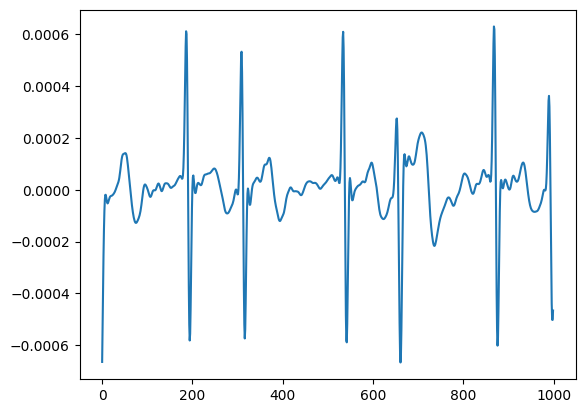

In [149]:
plt.plot(filt_resting)

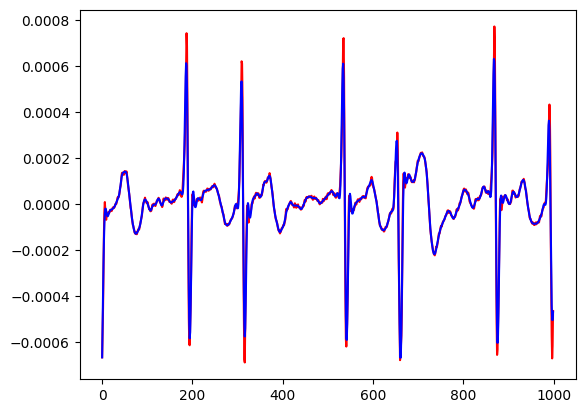

In [77]:
plt.plot(b, color='r')
plt.plot(filt_resting, color='b')
plt.show()

In [78]:
import Lab2Functions as lbf

In [145]:
b=raw_data[7][2000:3000]
b.shape

(1000,)

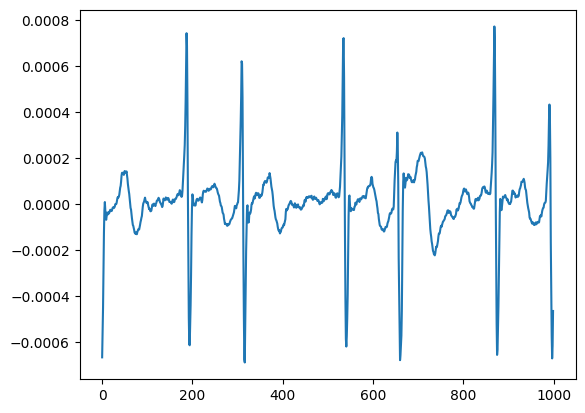

In [146]:
plt.plot(b)

In [80]:
t =  np.arange(1,1001)
t

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
         56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
         67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
         78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
         89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
        100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
        111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
        122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
        133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
        144,  145,  146,  147,  148,  149,  150,  1

In [93]:
peaks_d_ecg,_ = sps.find_peaks(filt_resting)

In [94]:
peaks_d_ecg

array([  8,  51,  95, 115, 125, 141, 173, 186, 202, 213, 249, 297, 309,
       323, 343, 362, 370, 418, 428, 460, 471, 509, 521, 534, 549, 578,
       597, 653, 670, 680, 708, 767, 803, 831, 845, 856, 868, 884, 893,
       911, 933, 980, 990], dtype=int64)

In [97]:
b = filt_resting

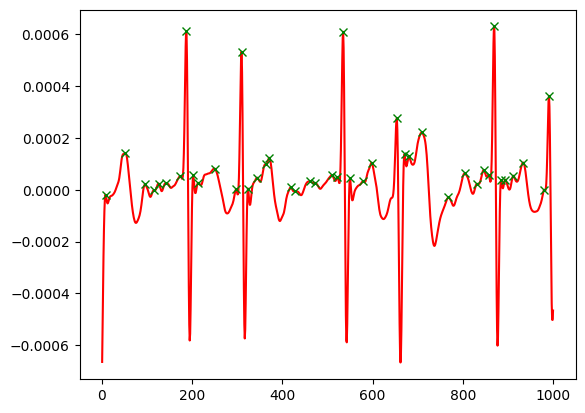

In [98]:
plt.figure()
plt.plot(t[0:len(t)], filt_resting, color = 'red')
plt.plot(t[peaks_d_ecg], filt_resting[peaks_d_ecg], "x", color = 'g')

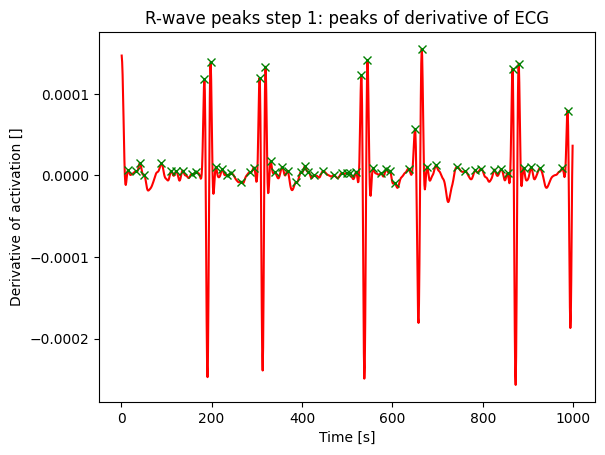

In [99]:
d_ecg, peaks_d_ecg = lbf.decg_peaks(b,t)

In [100]:
d_ecg.shape

(999,)

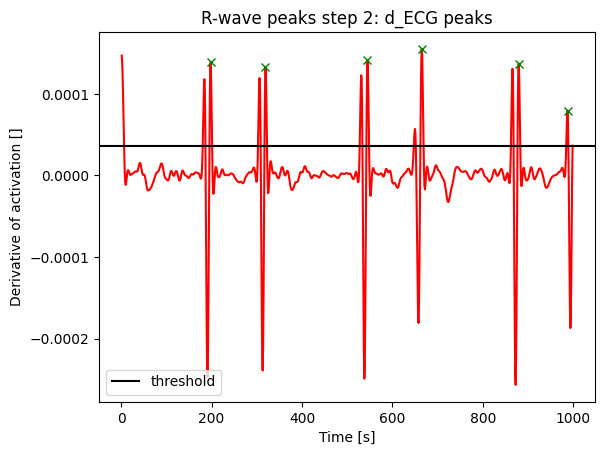

In [101]:
clear_peaks = lbf.d_ecg_peaks(d_ecg, peaks_d_ecg, t, 0.4,0.7)

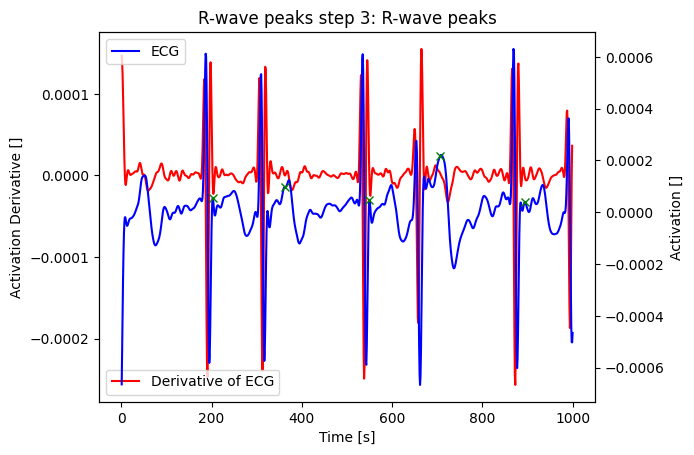

In [102]:
rwave_t = lbf.Rwave_peaks(b, d_ecg, clear_peaks, t)

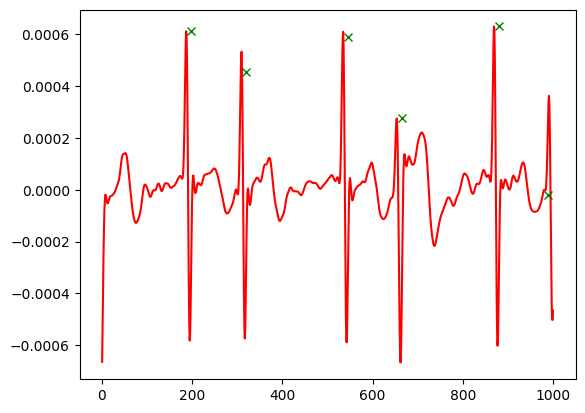

In [129]:
plt.Figure()
plt.plot(t, b,color='r')
plt.plot(t[clear_peaks], b[clear_peaks], "x", color = 'g')
plt.show()

In [108]:
rr_interval= np.diff(rwave_t)

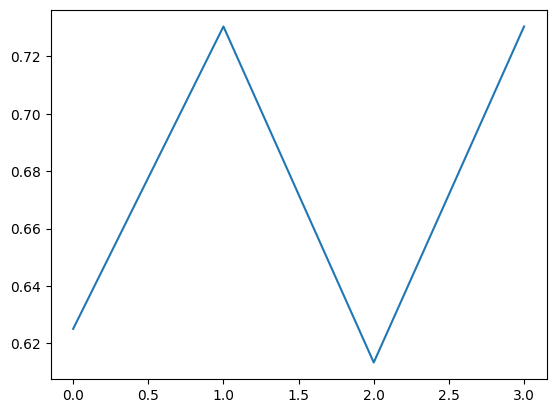

In [133]:
plt.plot(rr_interval/256)

In [132]:
hb = (1/(rr_interval/256))*60
# hb = 300/rr_interval
hb

array([96.        , 82.13903743, 97.8343949 , 82.13903743])

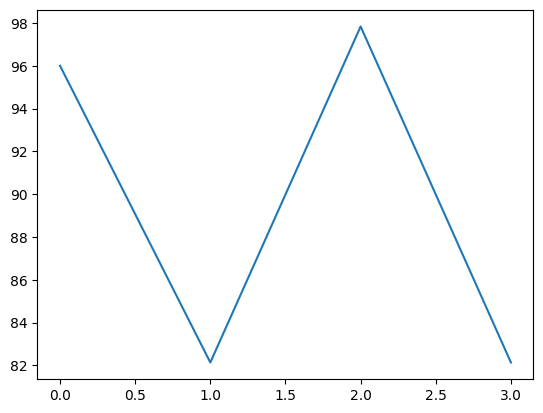

In [134]:
plt.plot(hb)

In [104]:
clear_peaks

array([197, 318, 544, 664, 879, 987], dtype=int64)

In [105]:
a = np.diff(raw_data[7][2000:3000])

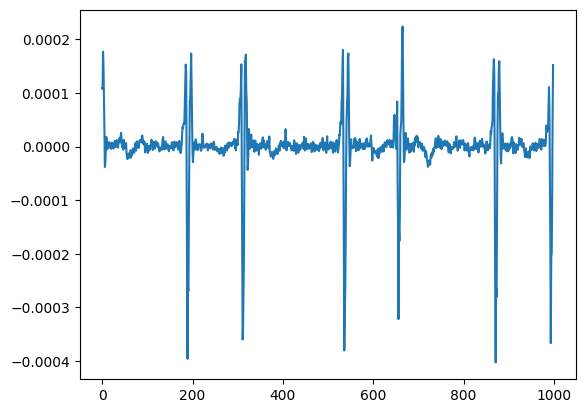

In [106]:
plt.plot(a)

<function matplotlib.pyplot.show(close=None, block=None)>

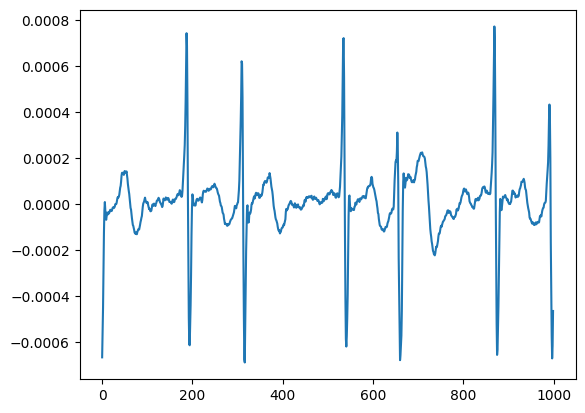

In [107]:
plt.plot(raw_data[7][2000:3000])
plt.show

In [152]:
import neurokit2 as nk
import pandas as pd

In [153]:
df = pd.DataFrame(b, columns=['ECG'])

In [157]:
# ecg_signal = nk.data(dataset= df['ECG'])
_, rpeaks = nk.ecg_peaks(df["ECG"], sampling_rate=256)

In [158]:
rpeaks

{'ECG_R_Peaks': array([187, 309, 535, 654, 869]), 'sampling_rate': 256}

In [163]:
ppa = np.diff(rpeaks['ECG_R_Peaks'])
ppa

array([122, 226, 119, 215])

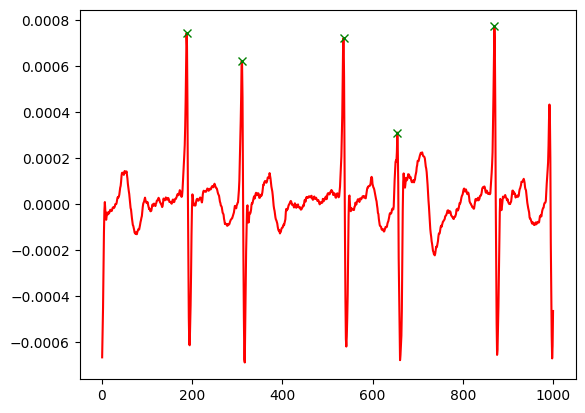

In [160]:
plt.Figure()
plt.plot(t, b,color='r')
plt.plot(t[rpeaks['ECG_R_Peaks']], b[rpeaks['ECG_R_Peaks']], "x", color = 'g')
plt.show()

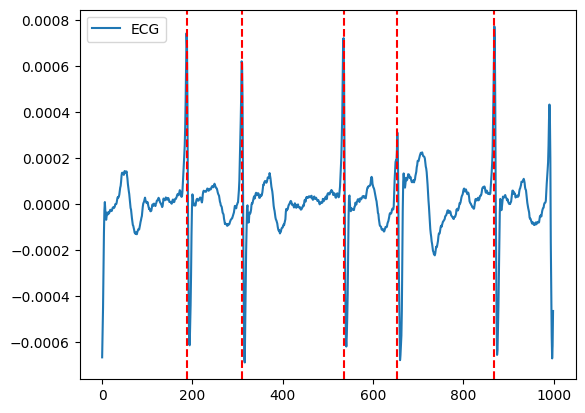

In [162]:
plot = nk.events_plot(rpeaks['ECG_R_Peaks'], df)

In [183]:
# Wn = np.array([3,30])
xb, xa = sps.butter(['3','30'],0.2,fs=256, btype='bandpass', output='sos')
nfilt_resting = sps.filtfilt(xb, xa, b)

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'list'